In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import matplotlib as mpl

Using TensorFlow backend.


### Function for Generating Synthetic Data which will be fed to a Time Series Model (RNN) for training.

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1,freq2,offsets1, offsets2 = np.random.rand(4, batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

### Function for plotting the Learning Curve based on the training of the model.

In [36]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0.097, 0.1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [47]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

In [6]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000,n_steps + 10)

In [7]:
x_train , y_train = series[:7000,:n_steps], series[:7000,-10:,0]
x_valid , y_valid = series[7000:9000,:n_steps], series[7000:9000,-10:,0]
x_test , y_test = series[9000:,:n_steps], series[9000:,-10:,0]

A small sample of the synthetic data generated by the above defined functions.

In [8]:
x_train[0]

array([[ 0.4596948 ],
       [ 0.33874455],
       [ 0.18980233],
       [ 0.00611999],
       [-0.19590542],
       [-0.38614848],
       [-0.5440984 ],
       [-0.62904716],
       [-0.6633958 ],
       [-0.65724516],
       [-0.51447874],
       [-0.42731112],
       [-0.2628813 ],
       [-0.11098029],
       [-0.06872579],
       [ 0.04623062],
       [ 0.10372286],
       [ 0.1274432 ],
       [ 0.11077672],
       [ 0.20935486],
       [ 0.1686173 ],
       [ 0.30519226],
       [ 0.34892887],
       [ 0.40506098],
       [ 0.43279782],
       [ 0.5162226 ],
       [ 0.49817306],
       [ 0.45241815],
       [ 0.4086634 ],
       [ 0.21097626],
       [ 0.02851706],
       [-0.13651516],
       [-0.40563533],
       [-0.5133381 ],
       [-0.6187918 ],
       [-0.6725328 ],
       [-0.60458714],
       [-0.50924724],
       [-0.4335859 ],
       [-0.29299685],
       [-0.14998436],
       [-0.00957834],
       [ 0.0731602 ],
       [ 0.08528376],
       [ 0.10068075],
       [ 0

In [9]:
y_train[0]

array([ 0.41148177,  0.4283559 ,  0.5610549 ,  0.47626573,  0.4683646 ,
        0.37582415,  0.24769652, -0.00905113, -0.18126327, -0.38846615],
      dtype=float32)

Shapes for train, validation and test sets.

In [10]:
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(7000, 50, 1) (7000, 10)
(2000, 50, 1) (2000, 10)
(1000, 50, 1) (1000, 10)


### Ploting the synthetic data.

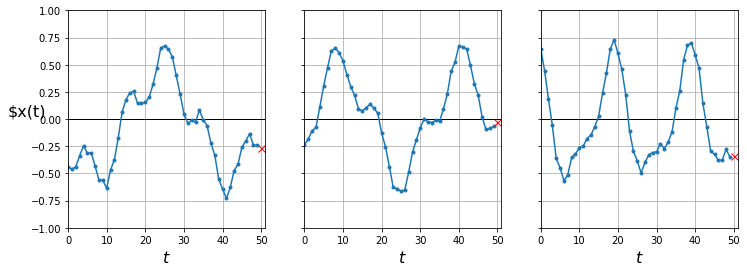

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [11]:
def plot_series(series,y=None,y_pred = None,x_label="$t$",y_label="$x(t)$"):
  plt.plot(series,".-")
  if y is not None:
    plt.plot(n_steps,y,"rx",markersize=7)
  if y_pred is not None:
    plt.plot(n_steps, y_pred,"go")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0,0, 100, linewidth=1)
  plt.axis([0, n_steps + 1,-1,1])
  plt.figure(figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(x_valid[col,:,0],y_valid[col,0],
              y_label=("$x(t)" if col==0 else None))
  

plt.show()

A prediction based on mean value for the synthetic data.

# Simple RNN for multiple prediction.

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None,1]),
        keras.layers.Dense(10)    
])

optimizer = keras.optimizers.Adam(lr=0.007)
model.compile(loss="mse",optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid,y_valid))



Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.1271 - val_loss: 0.1037
Epoch 2/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1012 - val_loss: 0.1013
Epoch 3/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0995 - val_loss: 0.0996
Epoch 4/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0984 - val_loss: 0.0986
Epoch 5/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0978 - val_loss: 0.0985
Epoch 6/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0978 - val_loss: 0.0987
Epoch 7/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0978 - val_loss: 0.0985
Epoch 8/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0978 - val_loss: 0.0985
Epoch 9/20
7000/7000 [==============================] - 14s 2ms/step - loss: 0.0977 - val_loss: 0.0986
Epoch 10/20
7000/7000 [==

In [19]:
model.evaluate(x_valid,y_valid)

2000/2000 [==============================] - 0s 183us/step


0.09865335708856583

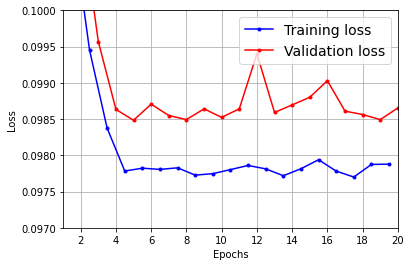

In [37]:
plot_learning_curves(model.history.history["loss"],model.history.history["val_loss"])
plt.show()

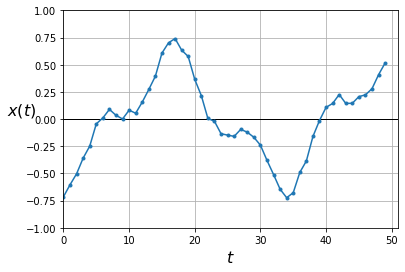

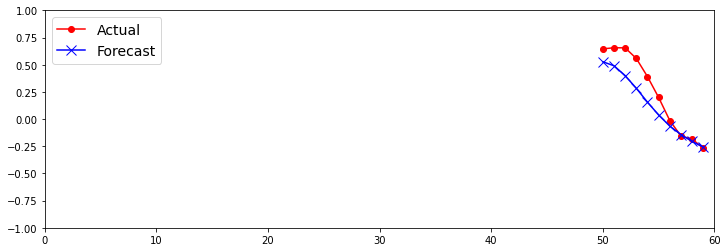

<Figure size 144x288 with 0 Axes>

In [48]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.figure(figsize=(2,4))
plt.show()

# Deep RNN for a multiple prediction.
(Returns a series of data)

In [52]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [55]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))     
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss='mse',optimizer=optimizer,metrics=[last_time_step_mse])
model.fit(X_train,Y_train,epochs=20,validation_data=(X_valid,Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 26s 4ms/step - loss: 0.0537 - last_time_step_mse: 0.0415 - val_loss: 0.0392 - val_last_time_step_mse: 0.0252
Epoch 2/20
7000/7000 [==============================] - 24s 3ms/step - loss: 0.0369 - last_time_step_mse: 0.0225 - val_loss: 0.0337 - val_last_time_step_mse: 0.0185
Epoch 3/20
7000/7000 [==============================] - 24s 3ms/step - loss: 0.0330 - last_time_step_mse: 0.0181 - val_loss: 0.0313 - val_last_time_step_mse: 0.0169
Epoch 4/20
7000/7000 [==============================] - 24s 3ms/step - loss: 0.0304 - last_time_step_mse: 0.0156 - val_loss: 0.0291 - val_last_time_step_mse: 0.0138
Epoch 5/20
7000/7000 [==============================] - 24s 3ms/step - loss: 0.0289 - last_time_step_mse: 0.0144 - val_loss: 0.0292 - val_last_time_step_mse: 0.0176
Epoch 6/20
7000/7000 [==============================] - 24s 3ms/step - loss: 0.0273 - last_time_step_mse: 0.0133 - val_loss: 0.

In [59]:
model.evaluate(X_valid, Y_valid)

2000/2000 [==============================] - 1s 341us/step


[0.018417165726423265, 0.006315604317933321]

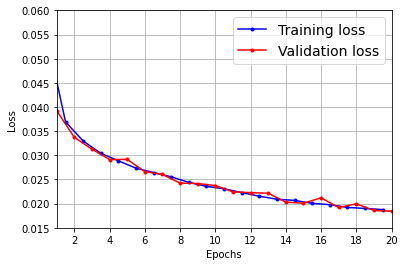

In [63]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0.015, 0.06])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(model.history.history["loss"], model.history.history["val_loss"])
plt.show()

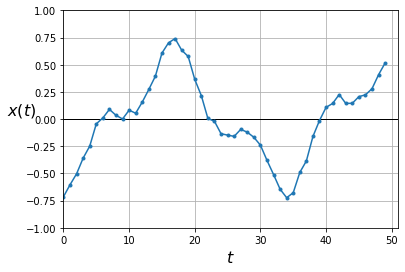

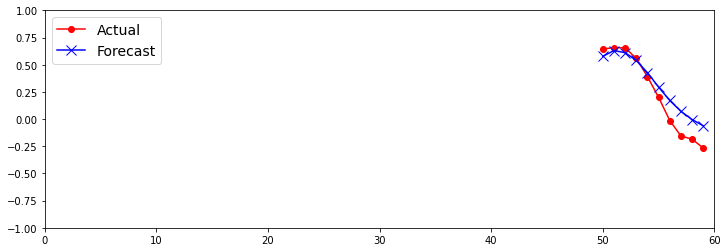

<Figure size 144x288 with 0 Axes>

In [65]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.figure(figsize=(2,4))
plt.show()